Resource :
- https://www.youtube.com/watch?v=DkzbCJtFvqM
- https://www.youtube.com/watch?v=GSt00_-0ncQ
- https://huggingface.co/transformers/v3.2.0/custom_datasets.html

# I. Introduction

Hugging face là một starup tập trung vào NLP, cung cấp số lượng lớn opensource liên quan tới NLP. Các opensource này được cung cấp thông qua lib tên *Transformer*

*Transformer* cung cấp API để dễ sử dụng một số transformer architecture nổi tiếng như BERT, RoBERTa, GPT2 và DistilBERT.

**Install**
> pip install transformers==4.20.0 fugashi ipadic

## 1. Pipeline
 
**Pipeline**
Là class đơn giản nhất trong transformer, giúp dễ dàng download pretrain model để thực hiện predict. 

*Pretrained model được chia thành nhiều task khác nhau, cụ thể như sau :*
- Sentiment analysis : Một đoạn text có nội dung positive or negative
- Text generatation (English)
- Name entity recognition : input 1 đoạn text, label từng từ vựng trong đó là person, place hay .v..v
- Question answering : Input 1 đoạn câu hỏi, model trả về câu trả lời
- Filling masked text : model điền vào đoạn text có chứa [mask]
- Translation
- Feature extraction : Return tensor thể hiện đoạn text input


In [1]:
from transformers import pipeline

C:\Users\Onsiter\.conda\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pretrained Model Sentiment analysis sẽ được donwload từ Huggingface

### 1.1. Task

Pipeline cung cấp rất nhiều model thực hiện các công việc khác nhau như đã liệt kê bên trên.

Để pipeline có thể load chính xác model cần thiết, ta define task name, ví dụ như bên dưới, task name = sentiment-analysis.

In [2]:
sentiment_model = pipeline(task="sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [3]:
sentiment_model("The pizza is quite good")

[{'label': 'POSITIVE', 'score': 0.9998606443405151}]

In [4]:
sentiment_model("The pizza is really good but it's too expensive")

[{'label': 'NEGATIVE', 'score': 0.9977707862854004}]

**NOTE** : Sentiment-analysis task được cung cấp bởi nhiều model khác nhau. Bằng cách setting `model=<Tên model>`, ta có thể load chính xác model cần dùng trên Hugging Face.

Nếu model = None, model có tên `distilbert-base-uncased-finetuned-sst-2-english` sẽ được tự động download về. Có thể tham khảo thông tin về model tại https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)

### 1.2. Model name

*Ứng với từng task như `entiment-analysis` sẽ có rất nhiều pre-trained model với tính năng, tập dữ liệu, ngôn ngữ support khác nhau.
Bằng cách chỉ định model name, pipeline sẽ download chính xác model cần sử dụng*

**Note:**
Với `model=None`, model default tương ứng với task được sử dụng.


Ví dụ sau sử dụng model có tên `daigo/bert-base-japanese-sentiment`. Có thể tìm tên model phù hợp trên web của hugging face.
https://huggingface.co/models?language=ja&sort=downloads&search=bert

Lib này yêu cầu phải cài đặt `pip install ipadic`

In [ ]:
sentiment_model_jp = pipeline("sentiment-analysis", model="daigo/bert-base-japanese-sentiment")

In [ ]:
sentiment_model_jp("この店の雰囲気がかなり良い")

In [ ]:
sentiment_model_jp("店員の態度が想像出来ない")

## 2. Model and Tokenizer

Pipeline sẽ tự động download 2 package gồm tokenizer và model, tuy nhiên để hiểu rõ hơn model hoạt động ra sao, ta có thể tách pipeline thành 2 phần :
- `Tokenizer` : Tranform text input qua vector
- `Model` : pre-trained model.

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name = "daigo/bert-base-japanese-sentiment")

# Load Model
model = AutoModelForSequenceClassification.from_pretrained(model_name = "daigo/bert-base-japanese-sentiment")

# Create pipeline 
sentiment_model_jp_custom = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [ ]:
sentiment_model_jp_custom("この店の雰囲気がかなり良い")

In [ ]:
sentiment_model_jp_custom("この店の店員の態度が悪い")

### 2.1 Tokenizer

Giúp convert raw text thành `sequences of tokens`, cụ thể như gồm các task sau
- `tokenize` : Tách đoạn văn thành các tokens, ví dụ như words hoặc subwords
- `Encode` : Convert từ tokens qua ID.

Ví dụ
> text ="私が目指すのは、新しい資本主義の実現です。"

Tokenize
> ['私','が','目指す','の','は','、', '新しい','資本','主義','の','実現','です',']

Encode
> [2,1325,14,5059,5,9,6,1842,4330,1008,5,2519,2992,8]

In [ ]:
tokenizer_output = tokenizer("この店の雰囲気がかなり良い")

In [ ]:
tokenizer_output

Tockenizer thực hiện các 2 **Steps** sau.

**Tokenizer**

In [ ]:
tokens = tokenizer.tokenize("この店の雰囲気がかなり良い")

In [ ]:
tokens

**Encode**

In [ ]:
tokens_ids = tokenizer.encode("この店の雰囲気がかなり良い")

In [ ]:
tokens_ids

**Note** : 
- Input text sẽ được add thêm 2 kí tự [cls] và [SEP] vào vị trí cuối. Ví dụ ['[CLS]','私','が','目指す','の','は','、','新しい','資本','主義','の','実現','です','。', [SEP]]

- 2 kí từ [CLS] và [SEP] có id tương ứng với 2 và 3

- Sử dụng `padding, truncatetion set = true` để toàn bộ các đoạn văn đều có độ dài như nhau.
- Return tensor, model chỉ có thể nhận input là tensor, vì vậy cần return tensor.

In [ ]:
tokenizer(["この店の雰囲気がかなり良い", "この店の店員の態度が悪い"], padding=True, truncation=True, max_length=512, return_tensors='pt')

### 2.2 Model

**Tìm hiểu cách thức hoạt động của model**

Như giới thiệu bên trên, huggingface cung cấp model được build bởi cả 2 thư viện Pytorch và Tensorflow.
Model ta sử dụng lần này là AutoModel, với task SequenceClassification. 
- Với model build bởi pytorch, `import AutoModelForSequenceClassification`
- Với model build bởi tensor, `import TFAutoModelForSequenceClassification`

Ví dụ này, ta sử dụng model được build bới Pytorch, vì vậy sử dụng `AutoModelForSequenceClassification`

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

**Step 1** : Tokenized input data.

In [ ]:
X_train = [
    "この店の雰囲気がかなり良い",
    "この店の店員の態度が悪い"
]

batch = tokenizer(X_train, padding=True, truncation=True, max_length=512, return_tensors='pt')

Tình huống không return_tensors=pt, ta có thể tự convert batch qua tensor bằng cách
```
batch = tokenizer(X_train, padding=True, truncation=True, max_length=512)
batch = torch.tensor(batch["input_ids"])

...

model(batch)
```

**Step 2** : Input tokenized data to model.

In [ ]:
with torch.no_grad():
    outputs = model(**batch)
    print(outputs)
    
    predictions = F.softmax(outputs.logits, dim=1)
    print(predictions)
    
    labels = torch.argmax(predictions, dim=1)
    print(labels)
    
    labels_name = [model.config.id2label.get(l_key) for l_key in labels.tolist()]
    print(labels_name)

Flows Xử lý model như sau 
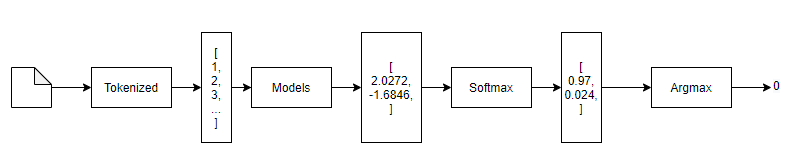

Note : bản thân model lưu trữ các config như target encoder. Có thể get thông tin config của model bằng cách 
```
model.config
```

In [ ]:
model.config.id2label

## 3. Save and load model

### 3.1 Save pretrain model

In [ ]:
save_pretrain_model_directory = "pretrain-model"

model.save_pretrained(save_pretrain_model_directory)
tokenizer.save_pretrained(save_pretrain_model_directory)

### 3.2 Load pretrain model

Thay vì download từ huggingface, có thể sử dụng model đã được lưu tại directory bên trên

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(save_pretrain_model_directory)
tokenizer = AutoTokenizer.from_pretrained(save_pretrain_model_directory)

___________________________________________________

# II. Dataset

https://huggingface.co/docs/datasets/index

Huggingface cung cấp class dataset giúp :
- Dễ dàng download và sharing dataset gồm audio, text và images
- Các method evaluation

> `pip install datasets`

Để sử dụng hết tính năng của dataset, cần tìm hiểu :

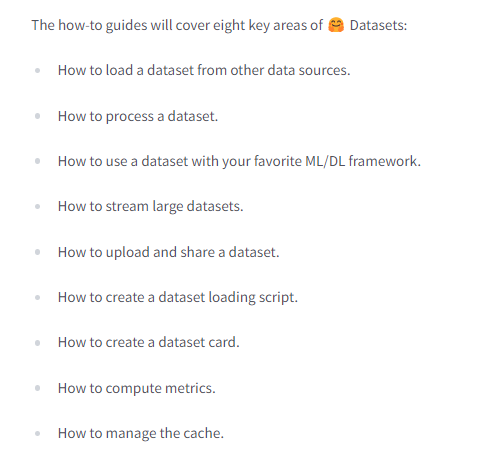

In [83]:
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from transformers import AutoTokenizer
import tensorflow as tf

## 1. Basic functions

In [4]:
df_raw = pd.read_csv("data/spam.csv", encoding='cp1252')[["v1", "v2"]].rename(columns={"v1": 'label', 'v2': 'text'})
df_raw = df_raw.sample(100).reset_index(drop=True)

In [60]:
encoder = LabelEncoder()

df_raw['label'] = encoder.fit_transform(df_raw.label.tolist())

**Load data**
Cho phép load data từ nhiều nguồn, trong đó đơn giản nhất load từ pandas
```
https://huggingface.co/docs/datasets/loading
```

In [61]:
dataset_raw = Dataset.from_pandas(df_raw)

In [62]:
dataset_raw

Dataset({
    features: ['label', 'text'],
    num_rows: 100
})

In [63]:
dataset_raw[0]

{'label': 0,
 'text': "He said i look pretty wif long hair wat. But i thk he's cutting quite short 4 me leh."}

**Tokenizer dataset**

In [64]:
model_name = 'distilbert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenization(sample):
    return tokenizer(sample['text'], return_tensors='tf')

In [65]:
dataset_tokenized_raw = dataset_raw.map(tokenization)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3038.76ex/s]


In [66]:
dataset_tokenized_raw

Dataset({
    features: ['label', 'text', 'input_ids', 'attention_mask'],
    num_rows: 100
})

In [67]:
dataset_tokenized_raw[0]

{'label': 0,
 'text': "He said i look pretty wif long hair wat. But i thk he's cutting quite short 4 me leh.",
 'input_ids': [[101,
   2002,
   2056,
   1045,
   2298,
   3492,
   15536,
   2546,
   2146,
   2606,
   28194,
   1012,
   2021,
   1045,
   16215,
   2243,
   2002,
   1005,
   1055,
   6276,
   3243,
   2460,
   1018,
   2033,
   3393,
   2232,
   1012,
   102]],
 'attention_mask': [[1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1]]}

**Convert to pytorch**

In [68]:
dataset_tokenized_torch_raw = dataset_tokenized_raw
dataset_tokenized_torch_raw.set_format(
    type="torch", 
    columns=["input_ids", "attention_mask", "label"]
)

In [69]:
dataset_tokenized_torch_raw

Dataset({
    features: ['label', 'text', 'input_ids', 'attention_mask'],
    num_rows: 100
})

In [70]:
dataset_tokenized_torch_raw[0]

{'label': tensor(0),
 'input_ids': [tensor([  101,  2002,  2056,  1045,  2298,  3492, 15536,  2546,  2146,  2606,
          28194,  1012,  2021,  1045, 16215,  2243,  2002,  1005,  1055,  6276,
           3243,  2460,  1018,  2033,  3393,  2232,  1012,   102])],
 'attention_mask': [tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1])]}

**Convert to tensor**

In [71]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

In [72]:
try:
    dataset_tokenized_raw = dataset_tokenized_raw.rename_column("label", "labels")
    dataset_tokenized_raw = dataset_tokenized_raw.remove_columns(["text"])

except:
    pass


dataset_tokenized_raw.set_format("torch")

In [73]:
dataset_tokenized_raw

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 100
})

In [ ]:
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
tf_dataset = dataset_tokenized_raw.to_tf_dataset(    
    columns=["attention_mask", "input_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

In [79]:
raw_text = df_raw["text"].values.tolist()

In [80]:
raw_text_tokenized = tokenizer(raw_text, truncation=True, padding=True)

In [85]:
raw_label = df_raw['label'].values.tolist()

In [87]:
raw_dataset = tf.data.Dataset.from_tensor_slices((
    dict(raw_text_tokenized),
    raw_label
))

In [97]:
for data in raw_dataset.shuffle(1000).batch(16):
    print(data)
    tmp = data
    break

({'input_ids': <tf.Tensor: shape=(16, 63), dtype=int32, numpy=
array([[  101, 28194,  3084, ...,     0,     0,     0],
       [  101,  1045,  2741, ...,     0,     0,     0],
       [  101, 17414,  7281, ...,     0,     0,     0],
       ...,
       [  101,  2035,  2080, ...,     0,     0,     0],
       [  101,  1045,  1005, ...,     0,     0,     0],
       [  101,  2079,  1045, ...,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(16, 63), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}, <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>)


In [100]:
tmp[0]

{'input_ids': <tf.Tensor: shape=(16, 63), dtype=int32, numpy=
 array([[  101, 28194,  3084, ...,     0,     0,     0],
        [  101,  1045,  2741, ...,     0,     0,     0],
        [  101, 17414,  7281, ...,     0,     0,     0],
        ...,
        [  101,  2035,  2080, ...,     0,     0,     0],
        [  101,  1045,  1005, ...,     0,     0,     0],
        [  101,  2079,  1045, ...,     0,     0,     0]])>,
 'attention_mask': <tf.Tensor: shape=(16, 63), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])>}

# III. Fine-tuning

***Tuning Flows :***
1. Prepare dataset.
2. Load pretrained Tokenizer
3. Build Pytorch Dataset
4. Load pretrained model
5. Tuning *Có 2 phương pháp tuning khác nhau*
    
    5.1 Load Trainer và train (Phương pháp đơn giản hóa mà hugging face cung cấp)
    
    5.2 Sử dụng Pytorch hoặc Tensorflow để thực hiện train (Phương pháp phức tạp hơn nhưng customize dễ dàng)
    
    
Tuning Doc:
- https://huggingface.co/docs/transformers/training
- https://huggingface.co/transformers/v3.3.1/training.html **Best explain about tunning**

## 1. Prepare data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
def load_data():
    """
    Load spam, split random data to Train, Test
    """
    df_raw = pd.read_csv("data/spam.csv", encoding='cp1252')[["v1", "v2"]]
    df_raw.rename(columns={"v1": "label", "v2": "sentences"}, inplace=True)

    # Encode label
    df_raw['label_encoded'] = df_raw.label.apply(lambda x: int(x=='spam'))

    # Split train and test
    X_train, X_test, y_train, y_test = train_test_split(df_raw["sentences"], df_raw["label_encoded"], test_size=0.2) 
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
    
    return df_raw, X_train.tolist(), X_val.tolist(), X_test.tolist(), y_train.tolist(), y_val.tolist(), y_test.tolist()

In [3]:
df_raw, X_train, X_val, X_test, y_train, y_val, y_test = load_data()

In [4]:
df_raw.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## 2. Fine-tune

https://huggingface.co/docs/transformers/training

**Có 3 phương pháp có thể fine-tune model.**
- Trainer. Class do transformer cung cấp.
- Pytorch. Sử dụng pytorch thực hiện tuning.
- Tensorflow. Sử dụng tensor thực hiện tuning.

### 2.1 Trainer 

*Hugging face cung cấp function `Trainer`, là cách đơn giản nhất để thực hiện Fine-tune model*

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
import numpy as np

In [20]:
model_name = 'distilbert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classi

#### 2.1.1 Processing Data

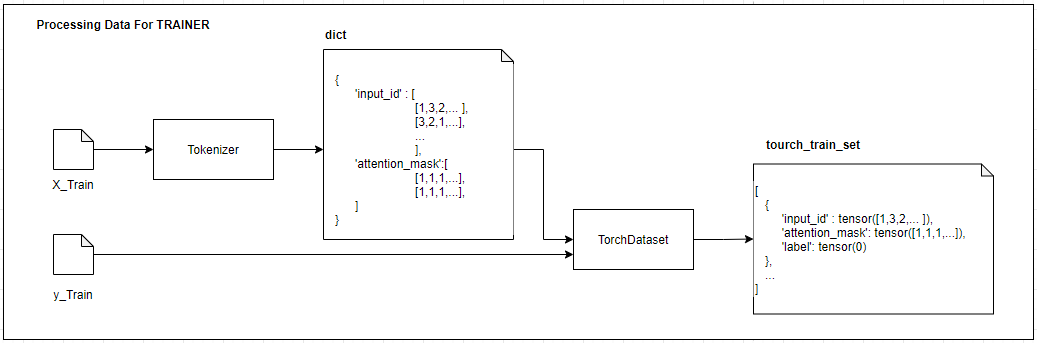

In [13]:
class TorchDataSet(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
        self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]).to(self.device) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx]).to(self.device)
        return item
    
    def __len__(self):
        return len(self.labels)

In [99]:
tokenize_train = tokenizer(X_train, truncation=True, padding=True)
tokenize_val = tokenizer(X_val, truncation=True, padding=True)
tokenize_test = tokenizer(X_test, truncation=True, padding=True)

torch_train_set = TorchDataSet(tokenize_train, y_train)
torch_val_set = TorchDataSet(tokenize_val, y_val)
torch_test_set = TorchDataSet(tokenize_test, y_val)

#### 2.1.2 Tuning

Importance Training Arguments
- auto_find_batch_size : Tự động tìm kiếm batch size phù hợp với environment. Required `pip install accelerate`
- seed, data_seed : G

In [10]:
training_args = TrainingArguments(
    output_dir="results", 
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
)

In [11]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=torch_train_set,
    eval_dataset=torch_val_set
)

In [12]:
trainer.train()

C:\Users\Onsiter\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 4011
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1506


Epoch,Training Loss,Validation Loss
1,0.073800,0.083816
2,0.027100,0.040672
3,0.008400,0.062362


Saving model checkpoint to results\checkpoint-500
Configuration saved in results\checkpoint-500\config.json
Model weights saved in results\checkpoint-500\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8
Saving model checkpoint to results\checkpoint-1000
Configuration saved in results\checkpoint-1000\config.json
Model weights saved in results\checkpoint-1000\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8
Saving model checkpoint to results\checkpoint-1500
Configuration saved in results\checkpoint-1500\config.json
Model weights saved in results\checkpoint-1500\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1506, training_loss=0.036255549197456244, metrics={'train_runtime': 143.7033, 'train_samples_per_second': 83.735, 'train_steps_per_second': 10.48, 'total_flos': 688026613230684.0, 'train_loss': 0.036255549197456244, 'epoch': 3.0})

#### 2.1.3 Evaluation

In [14]:
trainer.evaluate(torch_test_set)

***** Running Evaluation *****
  Num examples = 446
  Batch size = 8


{'eval_loss': 2.294200897216797,
 'eval_runtime': 1.1598,
 'eval_samples_per_second': 384.562,
 'eval_steps_per_second': 48.286,
 'epoch': 3.0}

In [16]:
predict_values = trainer.predict(torch_test_set)[0]

y_predict = np.argmax(predict_values, axis=-1)

confusion_matrix(torch_test_set.labels, y_predict)

***** Running Prediction *****
  Num examples = 446
  Batch size = 8


array([[320,  56],
       [ 64,   6]], dtype=int64)

#### 2.1.4 Advance

Trainer gồm nhiều function như bên dưới, dựa vào các tình huống cụ thể, có thể overwrite function của trainer.

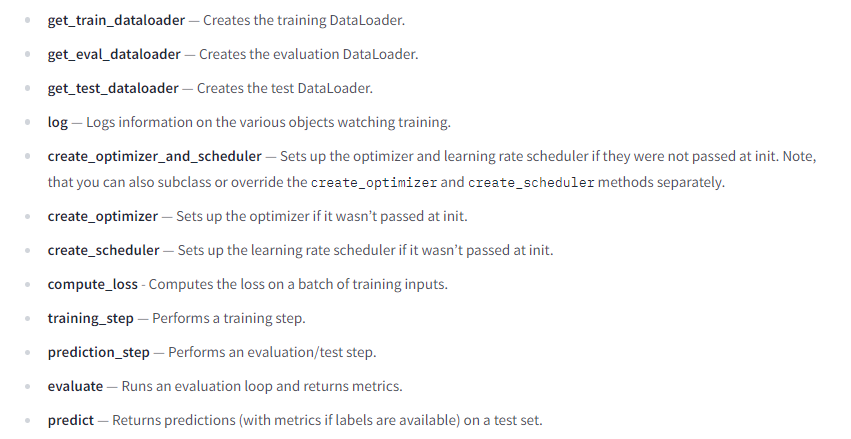

##### 2.1.4.1 Customize compute loss
*Do data bị unbalance, vì vậy tỉ lệ đoán đúng ở TP cao, nhưng FP rất thấp, vì vậy cần customize loss function bằng cách đưa tăng weight cho class FP*


**NOTE**
- Make sure model and any variable is set to run by GPU.

In [9]:
from torch import nn

**Step 1. Customize Trainer Class**

In [16]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        # Fit input to model and get logist
        output = model(**inputs)
        logits = output.get('logits')
        
        # Extract label from input
        labels = inputs.get("labels")
        
        # Lost func calculation
        weight = torch.from_numpy(np.array([0.8, 0.2])).float().cuda()
        loss_func = nn.CrossEntropyLoss(weight=weight)
        
        loss = loss_func(logits, labels)
        
        return (loss, output) if  return_outputs else loss

**Step 2. Load Model**

In [ ]:
model_name = 'distilbert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

device = torch.device(str("cuda:0") if torch.cuda.is_available() else "cpu") 
model = model.to(device) # the network should be on GPU, next(model.parameters()).is_cuda==False

**Step 3. Tuning**

In [ ]:
training_args = TrainingArguments(
    output_dir="results1", 
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
)

In [19]:
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=torch_train_set,
    eval_dataset=torch_val_set
)

In [23]:
trainer.train()

***** Running training *****
  Num examples = 4011
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1506


Epoch,Training Loss,Validation Loss
1,0.049100,0.009871
2,0.008100,0.014404
3,0.002200,0.015966


Saving model checkpoint to results1\checkpoint-500
Configuration saved in results1\checkpoint-500\config.json
Model weights saved in results1\checkpoint-500\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8
Saving model checkpoint to results1\checkpoint-1000
Configuration saved in results1\checkpoint-1000\config.json
Model weights saved in results1\checkpoint-1000\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8
Saving model checkpoint to results1\checkpoint-1500
Configuration saved in results1\checkpoint-1500\config.json
Model weights saved in results1\checkpoint-1500\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1506, training_loss=0.01970740364478582, metrics={'train_runtime': 148.5832, 'train_samples_per_second': 80.985, 'train_steps_per_second': 10.136, 'total_flos': 740951737325352.0, 'train_loss': 0.01970740364478582, 'epoch': 3.0})

**Step 4. Evaluation**

Ta thấy f1 score đã có kết quả tốt hơn trước.

In [25]:
predict_values = trainer.predict(torch_test_set)[0]

y_predict = np.argmax(predict_values, axis=-1)

confusion_matrix(torch_test_set.labels, y_predict)

***** Running Prediction *****
  Num examples = 446
  Batch size = 8


array([[346,  47],
       [ 39,  14]], dtype=int64)

##### 2.1.4.2 Customize compute metric

*Customize metric return tại từng Epoch*

**Step 1. Customize metrics**

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

**Step 2. Run Finetune**

In [35]:
try:
    del trainer
    
    import mlflow
    mlflow.end_run()
except:
    pass

training_args = TrainingArguments(
    output_dir="results", 
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=torch_train_set,
    eval_dataset=torch_val_set,
    compute_metrics=compute_metrics
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4011
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1506


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.008000,0.023704,0.991031,0.980392,0.943396,0.961538
2,0.006500,0.035410,0.991031,1.000000,0.924528,0.960784
3,0.004500,0.032776,0.991031,1.000000,0.924528,0.960784


Saving model checkpoint to results\checkpoint-500
Configuration saved in results\checkpoint-500\config.json
Model weights saved in results\checkpoint-500\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8
Saving model checkpoint to results\checkpoint-1000
Configuration saved in results\checkpoint-1000\config.json
Model weights saved in results\checkpoint-1000\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8
Saving model checkpoint to results\checkpoint-1500
Configuration saved in results\checkpoint-1500\config.json
Model weights saved in results\checkpoint-1500\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 446
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1506, training_loss=0.006296726676924521, metrics={'train_runtime': 150.5634, 'train_samples_per_second': 79.92, 'train_steps_per_second': 10.002, 'total_flos': 740951737325352.0, 'train_loss': 0.006296726676924521, 'epoch': 3.0})

##### 2.1.4. Eary Stopping

In [ ]:
from transformers import EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir='./results3',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    load_best_model_at_end=True,     # Early stopping yêu cầu phải được set = True.
    evaluation_strategy = 'steps',   # Sử dụng evaluation step thay vì `epoch`
    
)

trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    train_dataset=torch_train_set,
    eval_dataset=torch_val_set,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

### 2.2 PyTorch

#### 2.2.1 Processing Data

- `DataLoader` giúp split Tourch Data Set thành nhiều batch size khác nhau. Ví dụ bên dưới, ta set `batch_size = 8`. Mỗi batch sẽ chứa 8 samples.

```
for train_set in dataloader_train_set:
    print(train_set.get('input_ids').shape)
    
>> torch.Size([8, 238])
```

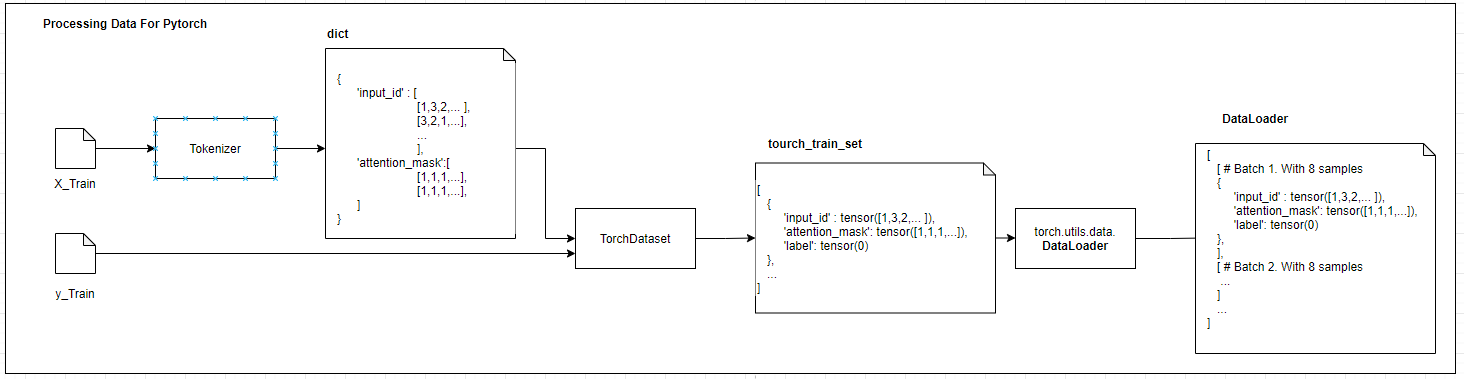

In [9]:
from torch.utils.data import DataLoader

In [10]:
tokenize_train = tokenizer(X_train, truncation=True, padding=True)
tokenize_val = tokenizer(X_val, truncation=True, padding=True)
tokenize_test = tokenizer(X_test, truncation=True, padding=True)

torch_train_set = TorchDataSet(tokenize_train, y_train)
torch_val_set = TorchDataSet(tokenize_val, y_val)
torch_test_set = TorchDataSet(tokenize_test, y_val)

dataloader_train = DataLoader(torch_train_set, batch_size=8, shuffle=True)
dataloader_val = DataLoader(torch_val_set, batch_size=8, shuffle=True)
dataloader_test = DataLoader(torch_test_set, batch_size=8, shuffle=True)

#### 2.2.2 Tuning

In [11]:
# Setting training
epochs_num = 3
learning_rate = 5e-5

# Load Model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Optimizer
optim = torch.optim.AdamW(model.parameters(), lr=5e-5)

In [ ]:
model.train()

for epoch in range(epochs_num):
    for batch in dataloader_train:
        optim.zero_grad()

        outputs = model(**batch)
        
        loss = outputs[0]
        loss.backward()
        optim.step()

model.eval()

#### 2.2.3 Evaluation

In [66]:
from sklearn.metrics import accuracy_score

In [63]:
y_predict = []

for data in DataLoader(torch_test_set, batch_size=1):
    output = model(**data)
    y_pred = torch.argmax(output.logits)
    
    y_predict.append(y_pred.tolist())

In [67]:
accuracy_score(torch_test_set.labels, y_predict)

0.7488789237668162

In [68]:
confusion_matrix(torch_test_set.labels, y_predict)

array([[326,  49],
       [ 63,   8]], dtype=int64)

### 2.3 Tensorflow

#### 2.3.1 Processing Data

Có 2 phương pháp Processing data.
- Sử dụng function Dataset do tensorflow cung cấp.  Hướng dẫn https://huggingface.co/transformers/v3.2.0/custom_datasets.html
- Sử dụng function dataset do HunggingFace cung cấp. Hướng dẫn https://huggingface.co/docs/transformers/training
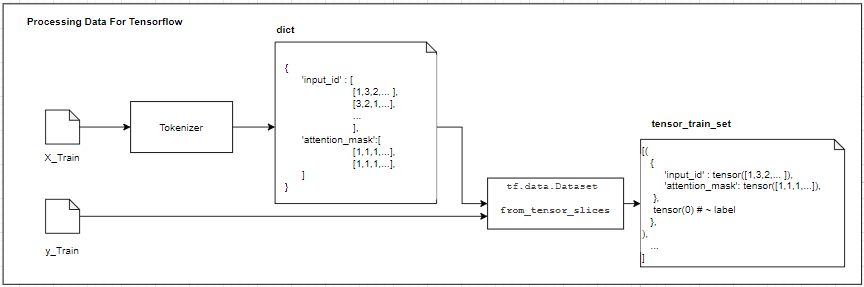

In [186]:
import tensorflow as tf
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification, Trainer, TrainingArguments

model_name = 'distilbert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_173', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

In [187]:
tokenize_train = tokenizer(X_train, truncation=True, padding=True)
tokenize_val = tokenizer(X_val, truncation=True, padding=True)
tokenize_test = tokenizer(X_test, truncation=True, padding=True)

In [188]:
tensor_train = tf.data.Dataset.from_tensor_slices((
    dict(tokenize_train),
    y_train
))

tensor_val = tf.data.Dataset.from_tensor_slices((
    dict(tokenize_val),
    y_val
))

tensor_test = tf.data.Dataset.from_tensor_slices((
    dict(tokenize_test),
    y_test
))

#### 2.3.2 Tuning

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

In [29]:
model.fit(
    tensor_train.shuffle(1000).batch(16),
    validation_data=tensor_val.shuffle(1000).batch(16),
    epochs=2, 
    batch_size=16
)

Epoch 1/2
251/251 [==============================] - 54s 215ms/step - loss: 0.0093 - sparse_categorical_accuracy: 0.9978 - val_loss: 0.0697 - val_sparse_categorical_accuracy: 0.9843
Epoch 2/2
251/251 [==============================] - 58s 232ms/step - loss: 0.0020 - sparse_categorical_accuracy: 0.9995 - val_loss: 0.0684 - val_sparse_categorical_accuracy: 0.9865


#### 2.3.3 Evaluation

In [42]:
predict_values = model.predict(tensor_test)

predict_values = predict_values.logits

y_predict_class = tf.argmax(predict_values, axis=1)

confusion_matrix(y_test, y_predict_class)

1115/1115 [==============================] - 10s 9ms/step


array([[973,   6],
       [  5, 131]], dtype=int64)

# IV. Feature Base

Doc: http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

*Là phương pháp sử dụng pre-trained model như một bước tiền xử lý dữ liệu, output vector sẽ được dùng để train model.*

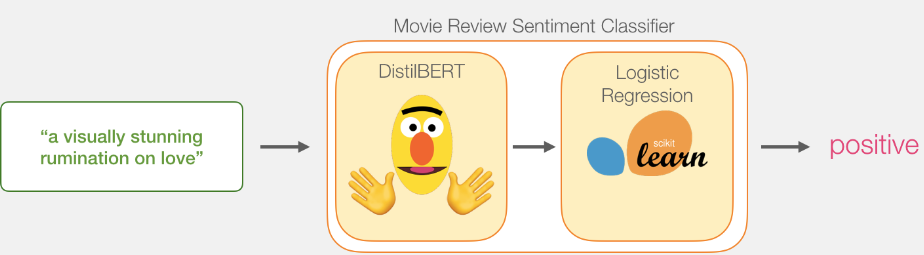

Features base đơn giản được chia thành 3 step như sau : 


**STEP1** Sentence Embedding

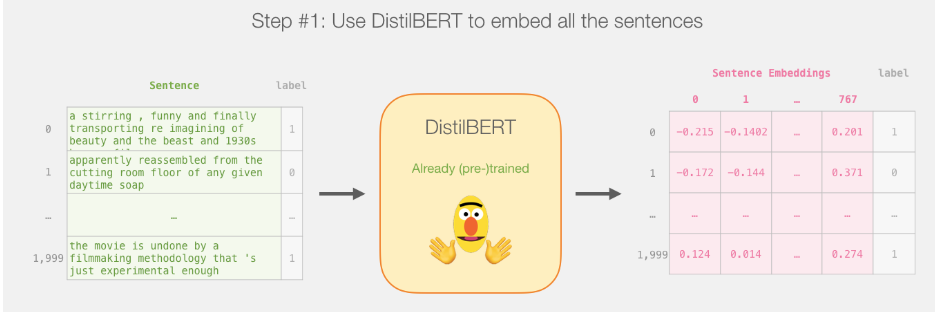


**STEP 2** Sentence Embedding được chia thành train test

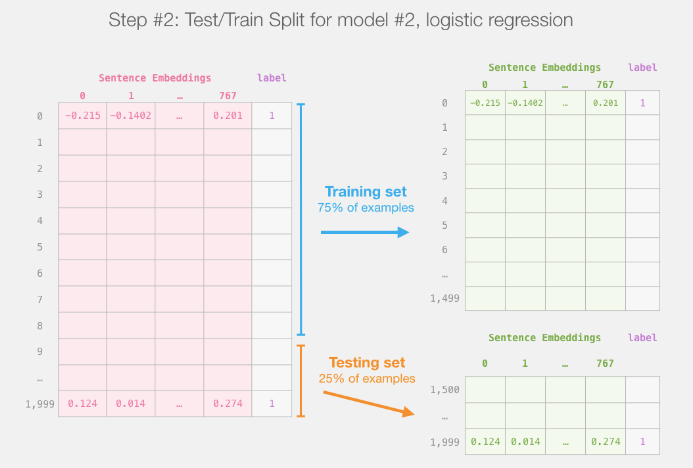


**STEP 3** TRAINING

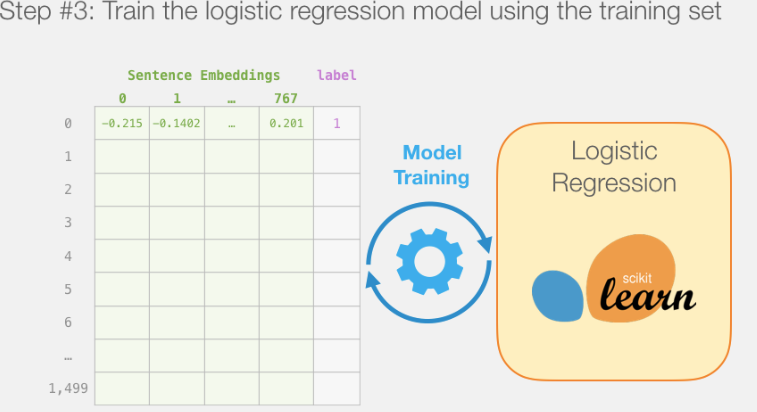

## 1. Use Pytorch

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertConfig
import torch
from torch.utils.data import DataLoader
import numpy as np

C:\Users\Onsiter\.conda\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model_name = 'distilbert-base-uncased'
         
tokenizer = AutoTokenizer.from_pretrained(model_name)

config = BertConfig.from_pretrained(model_name, output_hidden_states=True, return_dict=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)

# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device = torch.device('cpu')
model.to(device)

### 1.1 Processing Data

In [13]:
class TorchDataSet(torch.utils.data.Dataset):
    def __init__(self, input_ids):
        self.input_ids = input_ids
        # self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        self.device = torch.device('cpu')
        
    def __getitem__(self, idx):
        item = {'input_ids': torch.tensor(self.input_ids[idx]).to(self.device) }
        return item
    
    def __len__(self):
        return len(self.input_ids)

In [14]:
tokenized_X_train = tokenizer(X_train, padding=True, truncation=True)
tokenized_X_test =  tokenizer(X_test, padding=True, truncation=True)

torch_set_train = TorchDataSet(tokenized_X_train.get('input_ids'))
torch_set_test = TorchDataSet(tokenized_X_test.get('input_ids'))

dataloader_train = DataLoader(torch_set_train, batch_size=128, shuffle=False)

In [ ]:
outputs = []
for i, bath in enumerate(dataloader_train):
    
    _out = model(**bath)
    _last_layer = _out.hidden_states[-1]
    _cls_vector = _last_layer[:, 0, :]
    
    outputs.append(_cls_vector)
    
    print(i)

### 1.2 Build Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [41]:
X = last_layer_cls_emb.cpu().detach().numpy()

In [43]:
y = y_train[:100]

In [44]:
clf = LogisticRegression(random_state=0).fit(X, y)

C:\Users\Onsiter\.conda\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [45]:
clf.predict(X)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

## 2. Use Tensorflow

In [2]:
import tensorflow as tf
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification, Trainer, TrainingArguments

model_name = 'distilbert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

C:\Users\Onsiter\.conda\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistil

In [3]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Input layers
input_ids = tf.keras.layers.Input(shape=(512,), name="input_ids", dtype="int32")
attention_mask = tf.keras.layers.Input(shape=(512, ), name="attention_mask", dtype="int32")

# Transform Layer
embeddings = model.distilbert(input_ids, attention_mask=attention_mask)[1]

#

In [24]:
model.distilbert

__________________________

# V. Deep dive models

## 1. Model
Ứng với mỗi models Input và Ouput có thể sẽ khác nhau, tuy nhiên cũng sẽ có điểm chung. 

Ta sẽ tìm hiểu Input và Output chi tiết tại chương này. 

Tham khảo inputs variable tại url : https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.TFDistilBertForSequenceClassification

In [27]:
from transformers import TFAutoModelForSequenceClassification

model_name = 'distilbert-base-uncased'
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_39', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [56]:
# model.summary()

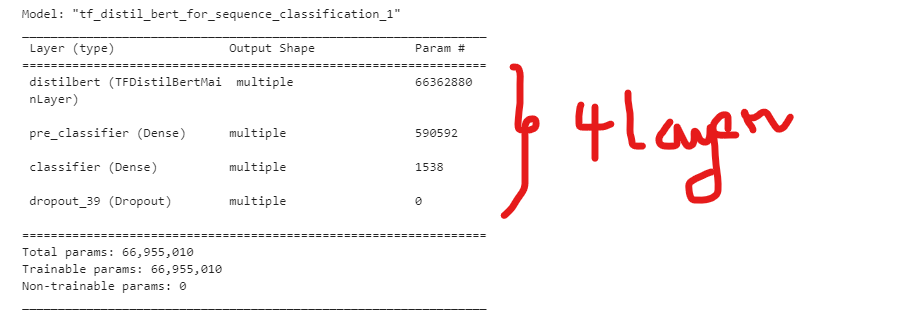

- Model gồm 4 layers, trong đó `BERT` layer nằm ở layer đầu tiên
- Access tới layer thông qua `model.layers` hoặc `model.<layer_name>` ví dụ `model.distilbert`
- Weight layer `model.layers[0].weights`
- Khi thực hiện tuning, để tránh update weight, có thể thực hiện `model.layers[0].trainable = False`

In [58]:
tokenizer.vocab_size

30522

In [87]:
model.layers[0]

In [88]:
model.distilbert

Model nhận 3 params quan trọng:
- input_ids : input id được tokenized
- attention_mask : nhận được từ tokenized
- labels : Not required. Nếu None, loss của model sẽ None. Nếu được truyền vào, loss model sẽ được tính toán, từ giá trị loss nhận được, có thể update weight cho model. 

In [28]:
text_batch = ["I love Pixar.", "I don't care for Pixar."]
label = [0, 1]

tf_label = tf.cast(label, tf.int32)

**Raw Data**
- Cho 2 câu ["I love Pixar.", "I don't care for Pixar."], label [0,1] tương ứng positive và negative

**Transform**
*Do model là dạng Tensorflow, vì vậy cần return về dạng tensor, có 2 cách thực hiện*:
- Cách 1 : tokenizer sử dụng `return_tensors='tf'`
- Cách 2 : Sử dụng `tf.cast()` để convert về data type như mong muốn

In [36]:
# Cách 1.
inputs1 = tokenizer(text_batch, return_tensors='tf', padding=True, truncation=True, )
outputs1 = model(**inputs1, labels=tf_label)

In [30]:
# Cách 2. 

encoding = tokenizer(text_batch, padding=True, truncation=True, )

inputs2 = {
    'input_ids': tf.cast(encoding.get("input_ids"), tf.int32),
    'attention_mask': tf.cast(encoding.get("attention_mask"), tf.int32),
    'labels': tf.cast(label, tf.int32)

}

outputs2 = model(**inputs2)

In [31]:
outputs1

TFSequenceClassifierOutput(loss=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.6960371 , 0.68417794], dtype=float32)>, logits=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.04468593, 0.05045751],
       [0.03155107, 0.04957069]], dtype=float32)>, hidden_states=None, attentions=None)

In [32]:
outputs2

TFSequenceClassifierOutput(loss=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.6960371 , 0.68417794], dtype=float32)>, logits=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.04468593, 0.05045751],
       [0.03155107, 0.04957069]], dtype=float32)>, hidden_states=None, attentions=None)

In [40]:
model.distilbert(**inputs1)

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(2, 12, 768), dtype=float32, numpy=
array([[[ 3.4019709e-02, -6.6927578e-03, -1.4624323e-01, ...,
         -1.0526595e-01,  4.8749053e-01,  2.8431541e-01],
        [ 5.2832651e-01,  2.6760536e-01, -1.8289202e-01, ...,
         -8.8303629e-04,  7.4926734e-01,  3.6566862e-01],
        [ 1.0713220e+00,  6.4043432e-01,  5.7274568e-01, ...,
         -2.3331147e-01,  5.8694959e-01,  1.5197034e-01],
        ...,
        [ 8.2670435e-02,  5.2127380e-02, -9.8093830e-02, ...,
          1.7210686e-01,  2.4491163e-01,  1.0410643e-01],
        [ 2.4761711e-01,  6.2976196e-02,  1.9212425e-02, ...,
          7.6376408e-02,  2.5096276e-01, -2.0748209e-02],
        [ 9.3785554e-02,  7.0093192e-02, -9.7792983e-02, ...,
          1.8248136e-01,  2.1425895e-01,  1.2580812e-01]],

       [[ 1.7257513e-01,  1.2390751e-01, -8.4526688e-02, ...,
          1.3114606e-02,  5.5684346e-01,  3.3941603e-01],
        [ 4.7622269e-01,  2.9056025e-01, -3.1635219e-01

In [48]:
model.distilbert(**inputs1)

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(2, 12, 768), dtype=float32, numpy=
array([[[ 3.4019709e-02, -6.6927578e-03, -1.4624323e-01, ...,
         -1.0526595e-01,  4.8749053e-01,  2.8431541e-01],
        [ 5.2832651e-01,  2.6760536e-01, -1.8289202e-01, ...,
         -8.8303629e-04,  7.4926734e-01,  3.6566862e-01],
        [ 1.0713220e+00,  6.4043432e-01,  5.7274568e-01, ...,
         -2.3331147e-01,  5.8694959e-01,  1.5197034e-01],
        ...,
        [ 8.2670435e-02,  5.2127380e-02, -9.8093830e-02, ...,
          1.7210686e-01,  2.4491163e-01,  1.0410643e-01],
        [ 2.4761711e-01,  6.2976196e-02,  1.9212425e-02, ...,
          7.6376408e-02,  2.5096276e-01, -2.0748209e-02],
        [ 9.3785554e-02,  7.0093192e-02, -9.7792983e-02, ...,
          1.8248136e-01,  2.1425895e-01,  1.2580812e-01]],

       [[ 1.7257513e-01,  1.2390751e-01, -8.4526688e-02, ...,
          1.3114606e-02,  5.5684346e-01,  3.3941603e-01],
        [ 4.7622269e-01,  2.9056025e-01, -3.1635219e-01

**OUTPUT**
- `logits` : Giá trị dự đoán ứng với từng samples.
- `loss` : Nếu nhiều hơn 1 class, cross-entropy sẽ được sử dụng để tính loss.
- `hidden_state`, `attentions` = None. Hidden state và attentions không được return. Sẽ tìm hiểu trong phần 2 về cách extract hidden state cũng như attentions layer.

## 2. Extract hidden state of model

Có thể lấy Hidden State của model bằng 2 cách :
- Sử dụng `BertConfig`.
- Thay vì sử dụng toàn model architecture của Bert model, sử dụng duy nhất mình `BERT Layer`

**Cách 1** Sử dụng BERT Config

**Step1:** Load model with config `output_hiddent_states = True`

In [ ]:
from transformers import BertConfig,TFAutoModelForSequenceClassification

model_name = 'distilbert-base-uncased'


tokenizer = AutoTokenizer.from_pretrained(model_name)

config = BertConfig.from_pretrained(model_name, output_hidden_states=True, return_dict=True)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, config=config)

**Step 2** Prepare sample data, input into models

⚠　**Note :** Model Tensorflow yêu cầu `intput_ids` và `attention_mask` phải được convert qua tensor type, sử dụng `tf.cast(<input>, <data type>)` 

In [117]:
text_batch = ["I love Pixar.", "I don't care for Pixar."]
encoding = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True, )

input_ids = tf.cast(encoding.get('input_ids'), tf.int32)
attention_mask = tf.cast(encoding.get("attention_mask"), tf.int32)

In [118]:
output = model(input_ids=input_ids, attention_mask=attention_mask)

**Step 3** Extract hidden state.

- Hidden state được lưu tại output[1].
- Length hidden state = `13`. Trong đó layer đầu tiên là `embedding vector`, 12 layer còn lại là `attention hidden states`

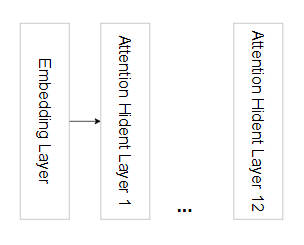

In [119]:
hidden_states = output[1]
embedding_output = hidden_states[0]
attention_hidden_states = hidden_states[1:]

print("Total number of layer ", len(hidden_states)) 

print("Embedding output length : 1. Shape is ", embedding_output.shape)

print("Hiddent state length : ", len(attention_hidden_states), " Shape of each layer is : ", attention_hidden_states[0].shape)

Total number of layer  13
Embedding output length : 1. Shape is  (2, 12, 768)
Hiddent state length :  12  Shape of each layer is :  (2, 12, 768)


**Chi tiết dimention tại hiddent layer**

- Dimension max length of word tùy thuộc vào độ dài của tập Train mà sẽ được quyết định. Ví dụ trong các sample, có sample độ dài 238, khi đó 238 sẽ đưuọc xem là độ dài tối đa.

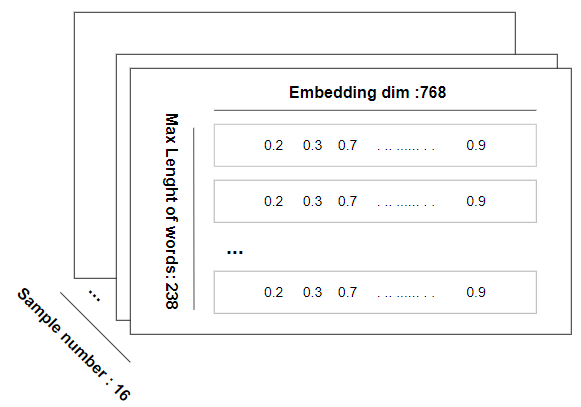

**Cách 2**: Sử dụng BERT layer

In [89]:
model_only_bert_layer = model.distilbert

In [104]:
output = model_only_bert_layer(input_ids=input_ids, attention_mask=attention_mask)

In [125]:
model_only_bert_layer.num_hidden_layers

6

In [127]:
model_only_bert_layer.embeddings

## QUESTION LIST : 
- Q1. Diffirent between BERT Based model with other model like DistilBERT Model, RobertA
- Q2. How Huggingface model was builded ? 

- Q3. Is Weight of model will be changed after run tuning model ? 
- Q4. How to add dense layer into last layer
- Q5. How optimizer model works ? 
- Q6. Is imposible to customize loss function and otpimizer function also ? 

_____________
> Q3. Is Weight of model will be changed after run tuning model ?

**Ans**: Có 2 phương pháp chính để sử dụng pre-trained model
- feature-based : Sử dụng model như công cụ extract features
- fine-tuning : Sử dụng lượng sample data nhỏ nhằm thay đổi weight của model.

Đối với phương án fine-tuning, chắc chắn weight của model sẽ thay đổi. 

In [291]:
weights = model.weights

In [292]:
len(weights)

104

In [294]:
weights[0].shape

TensorShape([30522, 768])

In [295]:
weights[1].shape

TensorShape([512, 768])

In [297]:
weights[2].shape

TensorShape([768])

In [298]:
weights[10].shape

TensorShape([768, 768])

In [299]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_233 (Dropout)       multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [5]:
tmp = list()

In [6]:
tmp.append(123)